In [2]:
from linares_plot import *
import scipy.io as io
import pickle


In [3]:
import os
os.getcwd()

'C:\\Users\\David\\Documents\\GitHub\\distractor_neurons\\Christos_first_second\\brian_simulations'

In [80]:
data = io.loadmat('C:\\Users\\David\\Desktop\\IDIBAPS\\brian_simulations\\results_simulation.mat') #,{'rate':rates, 'spktm': spikes.it})
spikes = data['spktm']

In [81]:
spikes

array([[  1.    ,  70.    , 493.    , ..., 231.    , 461.    , 351.    ],
       [  0.    ,   0.    ,   0.    , ...,   9.9979,   9.9979,   9.9983]])

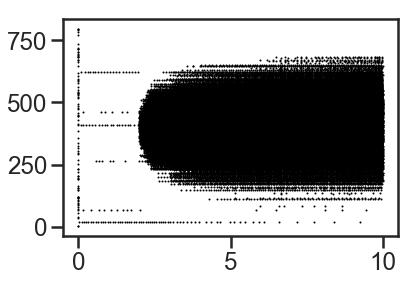

In [82]:
plt.plot(spikes[1],spikes[0],'k.',markersize=2)

In [83]:
spikes[1] ## todos los tiempos donde ha habido un spike
spikes[0] ## la neurona correspondiente que ha hecho el spike

array([  1.,  70., 493., ..., 231., 461., 351.])

In [ ]:
def heatmap_rate(RE, time_simulation, order2, angle_separation, target_onset, 
                 distractor_onset, pres_period, ON_OFF, save_name=False):
    #pal_cyan = sns.color_palette("viridis")
    
    dims=np.shape(RE)
    dimN = dims[0]
    plt.figure(figsize=(8,6))
    ax = sns.heatmap(RE, cmap="cividis", vmin=0, vmax=20,  cbar=True, 
                cbar_kws={"shrink": .82, 'ticks' : [0, 10, 20], 'label': 'rate (Hz)'})
    ax.figure.axes[-1].yaxis.label.set_size(20)
    ax.figure.axes[-1].tick_params(labelsize=20)
    ax.axis('tight')
    plt.gca().set_ylabel('')
    plt.gca().set_xlabel('')
    plt.gca().set_title('')
    p_stim = (180+angle_separation/2) * (dims[0]/360)
    p_dist = (180-angle_separation/2) * (dims[0]/360) 

    stimon = target_onset/2
    stimoff = (target_onset + pres_period) / 2
    diston = distractor_onset/2
    distoff = (distractor_onset + pres_period) / 2


    #plt.gca().plot([stimon, stimon+400], [p_stim, p_stim], ls='--', color ='blue', linewidth=1) 
    #plt.gca().plot([diston, diston+400], [p_dist, p_dist], ls='--', color ='red', linewidth=1) 

    plt.gca().set_xticks([])
    plt.gca().set_xticklabels([])
    #
    plt.gca().set_yticks([0, int(dimN/4), int(dimN/2),  int(3*dimN/4), int(dimN) ])
    plt.gca().set_yticklabels(['0','','180', '', '360'], fontsize=20)

    plt.gca().set_xlabel('', fontsize=20);
    plt.gca().set_ylabel('neuron preferred ($^\circ$)', fontsize=20);
    plt.gca().set_ylim(dimN+60, -45)

    ###

    ##line stims  
    c1='k'
    c2='k'
    
    if order2==False:
        s1on=stimon
        s1off=stimoff
        s2on=diston
        s2off=distoff
        c1='darkorange'
    else:
        s1on=diston
        s1off=distoff
        s2on=stimon
        s2off=stimoff
        c2='darkorange'

    plt.plot([0, s1on], [-15, -15], linestyle='-', color='k', linewidth=2)
    plt.plot([s1on, s1on], [-15, -40], linestyle='-', color=c1, linewidth=2)
    plt.plot([s1on, s1off], [-40, -40], linestyle='-', color=c1, linewidth=2)
    plt.plot([s1off, s1off], [-15, -40], linestyle='-', color=c1, linewidth=2)
    plt.plot([s1off, s2on], [-15, -15], linestyle='-', color='k', linewidth=2)
    plt.plot([s2on, s2on], [-15, -40],linestyle='-', color=c2, linewidth=2)
    plt.plot([s2on, s2off], [-40, -40],linestyle='-', color=c2, linewidth=2)
    plt.plot([s2off, s2off], [-15, -40], linestyle='-', color=c2, linewidth=2)
    plt.plot([s2off, dims[1]], [-15, -15], linestyle='-', color='k', linewidth=2)
    
    ###
    if ON_OFF=='ON':
        plt.text(dims[1]-300, 450, 'ON', weight="bold", fontsize=28, color='white');
    else:
        plt.text(dims[1]-300, 450, 'OFF', weight="bold", fontsize=28, color='white');
        

    
    #time
    x1sec = 1000 * dims[1] / time_simulation
    plt.plot([dims[1]-x1sec, dims[1]], [dimN+30, dimN+30], 'k-', linewidth=2)
    plt.text(dims[1]-300, 600, '1s', fontsize=20);
    
    
    if save_name!=False:
        plt.savefig(save_name + '.png', transparent=True) ##to save it transparent
    plt.show()

Text(1,-0.02,'')

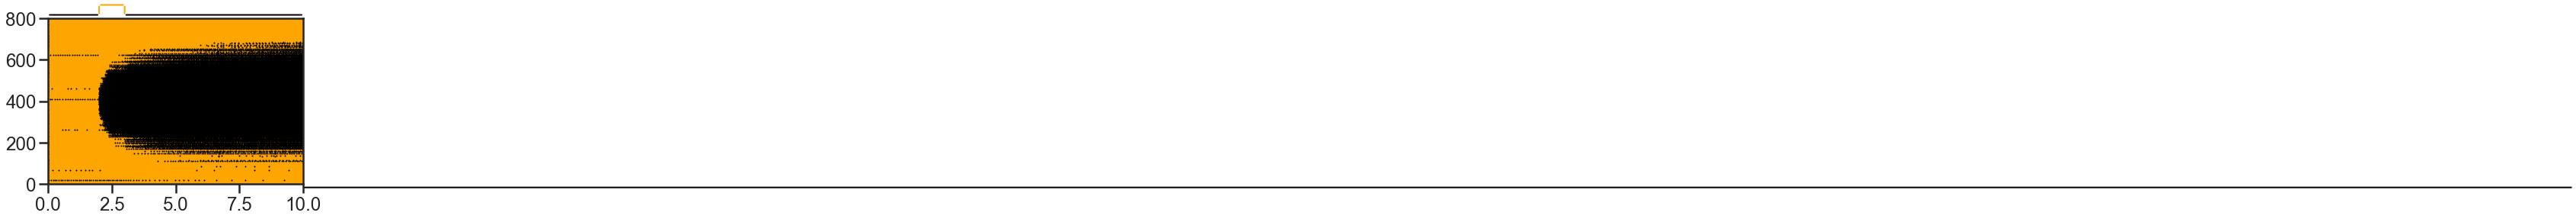

In [124]:
time_s =10
N=0.8*1000 #(el 80% son excitadoras)
stim_on=2
stim_off=3


stim_on/time_s

fig, ax = plt.subplots()
ax.plot(spikes[1],spikes[0], '.', markersize=2, color='black')
ax.set_facecolor("orange")
plt.xlim(0,time_s)
plt.ylim(0,N)

# ax = fig.add_subplot(1, 1, 1)
ax.annotate('', xy=(0, 1.02), xycoords='axes fraction', xytext=(stim_on/time_s, 1.02), arrowprops=dict(arrowstyle="-", color='black'))
ax.annotate('', xy=(stim_on/time_s, 1.02), xycoords='axes fraction', xytext=(stim_on/time_s, 1.08), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_on/time_s, 1.08), xycoords='axes fraction', xytext=(stim_off/time_s, 1.08), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, 1.08), xycoords='axes fraction', xytext=(stim_off/time_s, 1.02), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, 1.02), xycoords='axes fraction', xytext=(1, 1.02), arrowprops=dict(arrowstyle="-", color='black'))

ax.annotate('', xy=(time_s-1/time_s, -.02), xycoords='axes fraction', xytext=(1, -.02), arrowprops=dict(arrowstyle="-", color='black'))


# fig.plot([0, stim_on], [850, 850], linestyle='-', color='k', linewidth=2)
# plt.plot([stim_on, stim_on], [850, 890], linestyle='-', color='red', linewidth=2)
# plt.plot([stim_on, stim_off], [890, 890], linestyle='-', color='red', linewidth=2)
# plt.plot([stim_off, stim_off], [850, 890], linestyle='-', color='red', linewidth=2)
# plt.plot([stim_off, time_s], [850, 850], linestyle='-', color='k', linewidth=2)



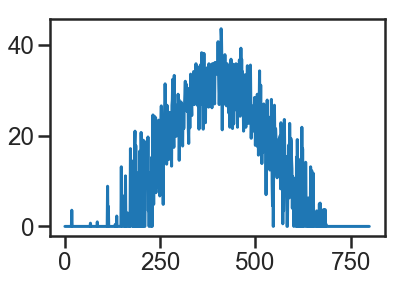

In [85]:
### Rate de todas las neuronas durante el delay
plt.plot(data['rate'][0])

In [62]:
## aquí tienes los spiketimes da cada una d elas neuronas

dict_spiketimes = pickle.load( open( "C:\\Users\\David\\Desktop\\IDIBAPS\\brian_simulations\\dict_spiketimes.pkl", "rb" ), 
                              encoding='latin1' )

dict_spiketimes

{0: array([], dtype=float64),
 1: array([], dtype=float64),
 2: array([], dtype=float64),
 3: array([0.2693, 0.6887, 0.9926, 1.6108, 1.7915, 2.0979, 2.2066, 2.3035,
        2.3928, 2.4892, 2.5862, 2.7077, 2.8498, 2.9573]),
 4: array([], dtype=float64),
 5: array([], dtype=float64),
 6: array([], dtype=float64),
 7: array([], dtype=float64),
 8: array([], dtype=float64),
 9: array([0.0009]),
 10: array([], dtype=float64),
 11: array([], dtype=float64),
 12: array([], dtype=float64),
 13: array([], dtype=float64),
 14: array([], dtype=float64),
 15: array([], dtype=float64),
 16: array([], dtype=float64),
 17: array([], dtype=float64),
 18: array([], dtype=float64),
 19: array([0.001]),
 20: array([], dtype=float64),
 21: array([0.0015]),
 22: array([], dtype=float64),
 23: array([], dtype=float64),
 24: array([], dtype=float64),
 25: array([], dtype=float64),
 26: array([], dtype=float64),
 27: array([], dtype=float64),
 28: array([], dtype=float64),
 29: array([], dtype=float64),
 30: 